<a href="https://colab.research.google.com/github/NEOEQ/Controle-de-Processos/blob/main/Transformadas%20de%20EDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install gekko

     |████████████████████████████████| 12.4 MB 65 kB/s 


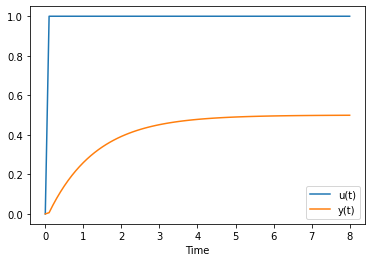

In [7]:
from gekko import GEKKO  # importando o pacote gekko
import numpy as np # importando o pacote matematico numpy
import matplotlib.pyplot as plt # importando a biblioteca gráfica

# Criando um modelo gekko
m = GEKKO()

# Pontos para a simulação
nt = 81 # nuemro de pontos
m.time = np.linspace(0,8,nt) 

# Define input
# First step (up) starts at 1 sec
# Ramp (down) starts at 3 sec
# Ramp completes at 5 sec
ut = np.zeros(nt)
ut[1:81] = 1.0


# Define model
u = m.Param(value=ut)
ud = m.Var()
y = m.Var()
dydt = m.Var()
m.Equation(ud==u)
m.Equation(dydt==y.dt())
m.Equation(5*y.dt() + 4*y==2*u)

# Simulation options
m.options.IMODE=7
m.options.NODES=4
m.solve(disp=False)

# plot results
plt.figure()
plt.plot(m.time,u.value,label='u(t)')
plt.plot(m.time,y.value,label='y(t)')
plt.legend()
plt.xlabel('Time')
plt.show()